# import

In [1]:
import fastai
from fastai.imports import *
from fastai.structured import *

/home/zero/anaconda/envs/fastai-cpu/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/zero/anaconda/envs/fastai-cpu/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/zero/anaconda/envs/fastai-cpu/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [13]:
import taproc
from taproc.eda import *
from taproc.utils import *
from taproc.feature import *
from taproc.pre_processing import *
from taproc.dataset import *
from taproc.learner import *

In [14]:
import numpy as np
import pandas as pd 

# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder

# File system manangement
import os

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import plotnine
from plotnine import *
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
import gc

In [16]:
from os import path

# read file

In [3]:
file_path = Path('/media/zero/dropbox/Dropbox/Data science project/kaggle/home_credit_default_risk/data')

In [4]:
app_train = pd.read_csv(str(file_path/'application_train.csv'))

In [5]:
app_train_proc, y, na_dict = tabular_proc(app_train, y_fld = 'TARGET', max_n_cat=15)

# EDA

## distibution of target

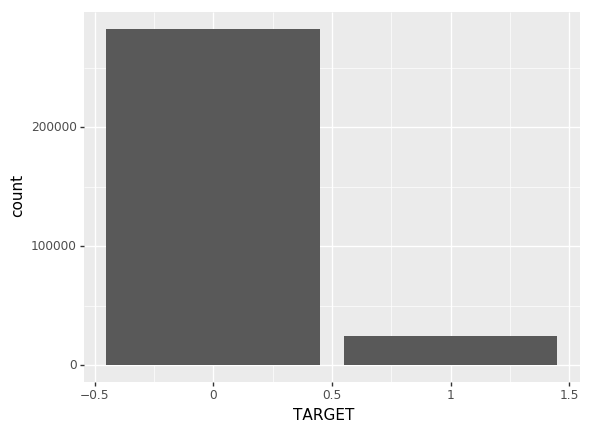

<ggplot: (8741109936704)>

In [47]:
(ggplot(app_train)
    + aes('TARGET')
    + geom_bar())

## missing data

In [15]:
mss = missing.from_df(app_train)

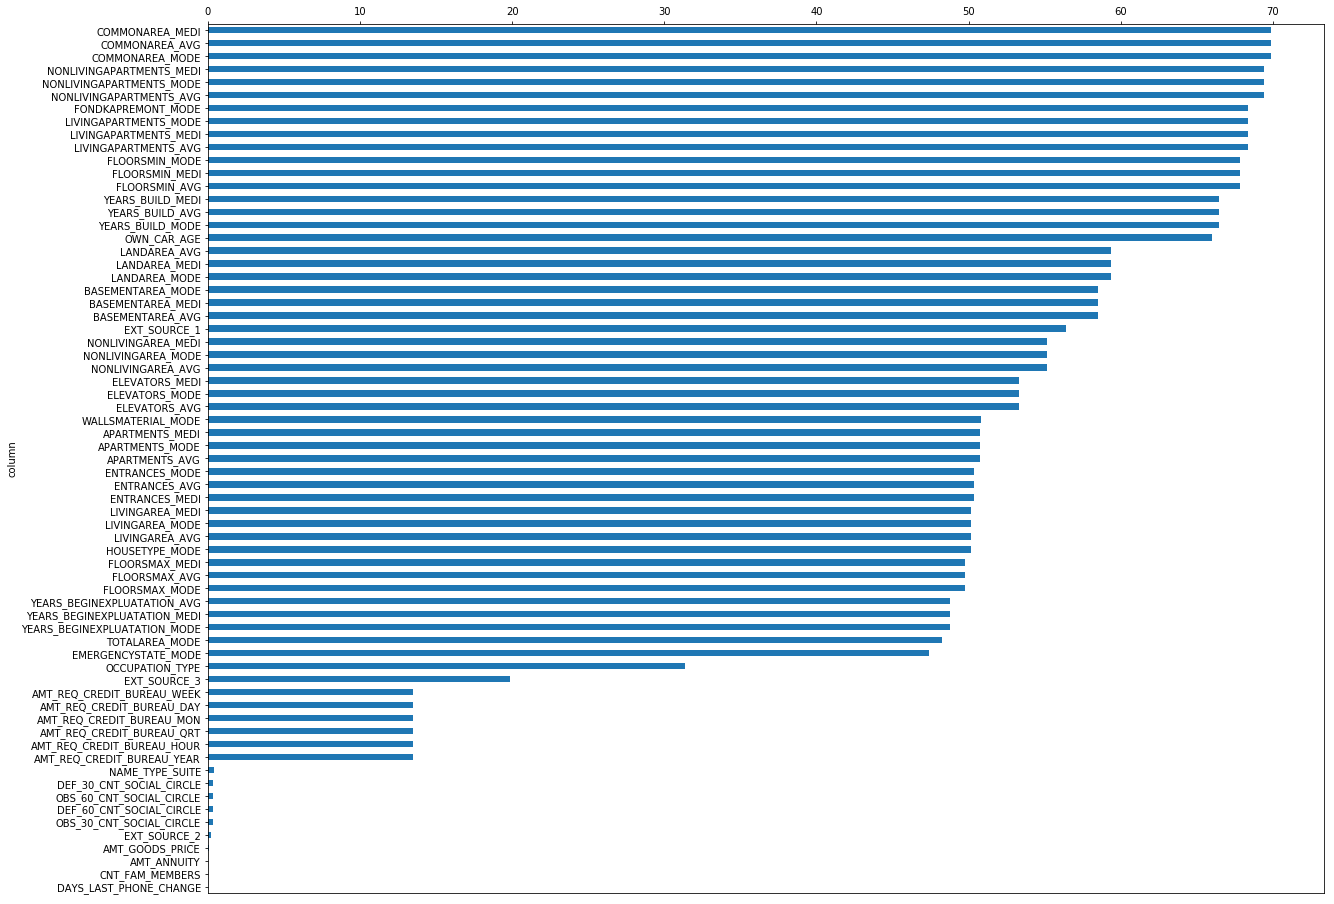

In [16]:
mss.plot()

In [17]:
mss.top(5)

['COMMONAREA_MEDI',
 'COMMONAREA_AVG',
 'COMMONAREA_MODE',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAPARTMENTS_MODE']

In [18]:
mss[:5]

,column,missing_percent
41,COMMONAREA_MEDI,69.872297
13,COMMONAREA_AVG,69.872297
27,COMMONAREA_MODE,69.872297
49,NONLIVINGAPARTMENTS_MEDI,69.432963
35,NONLIVINGAPARTMENTS_MODE,69.432963


## correlation

In [77]:
corr = correlation.from_df(app_train, 'TARGET')

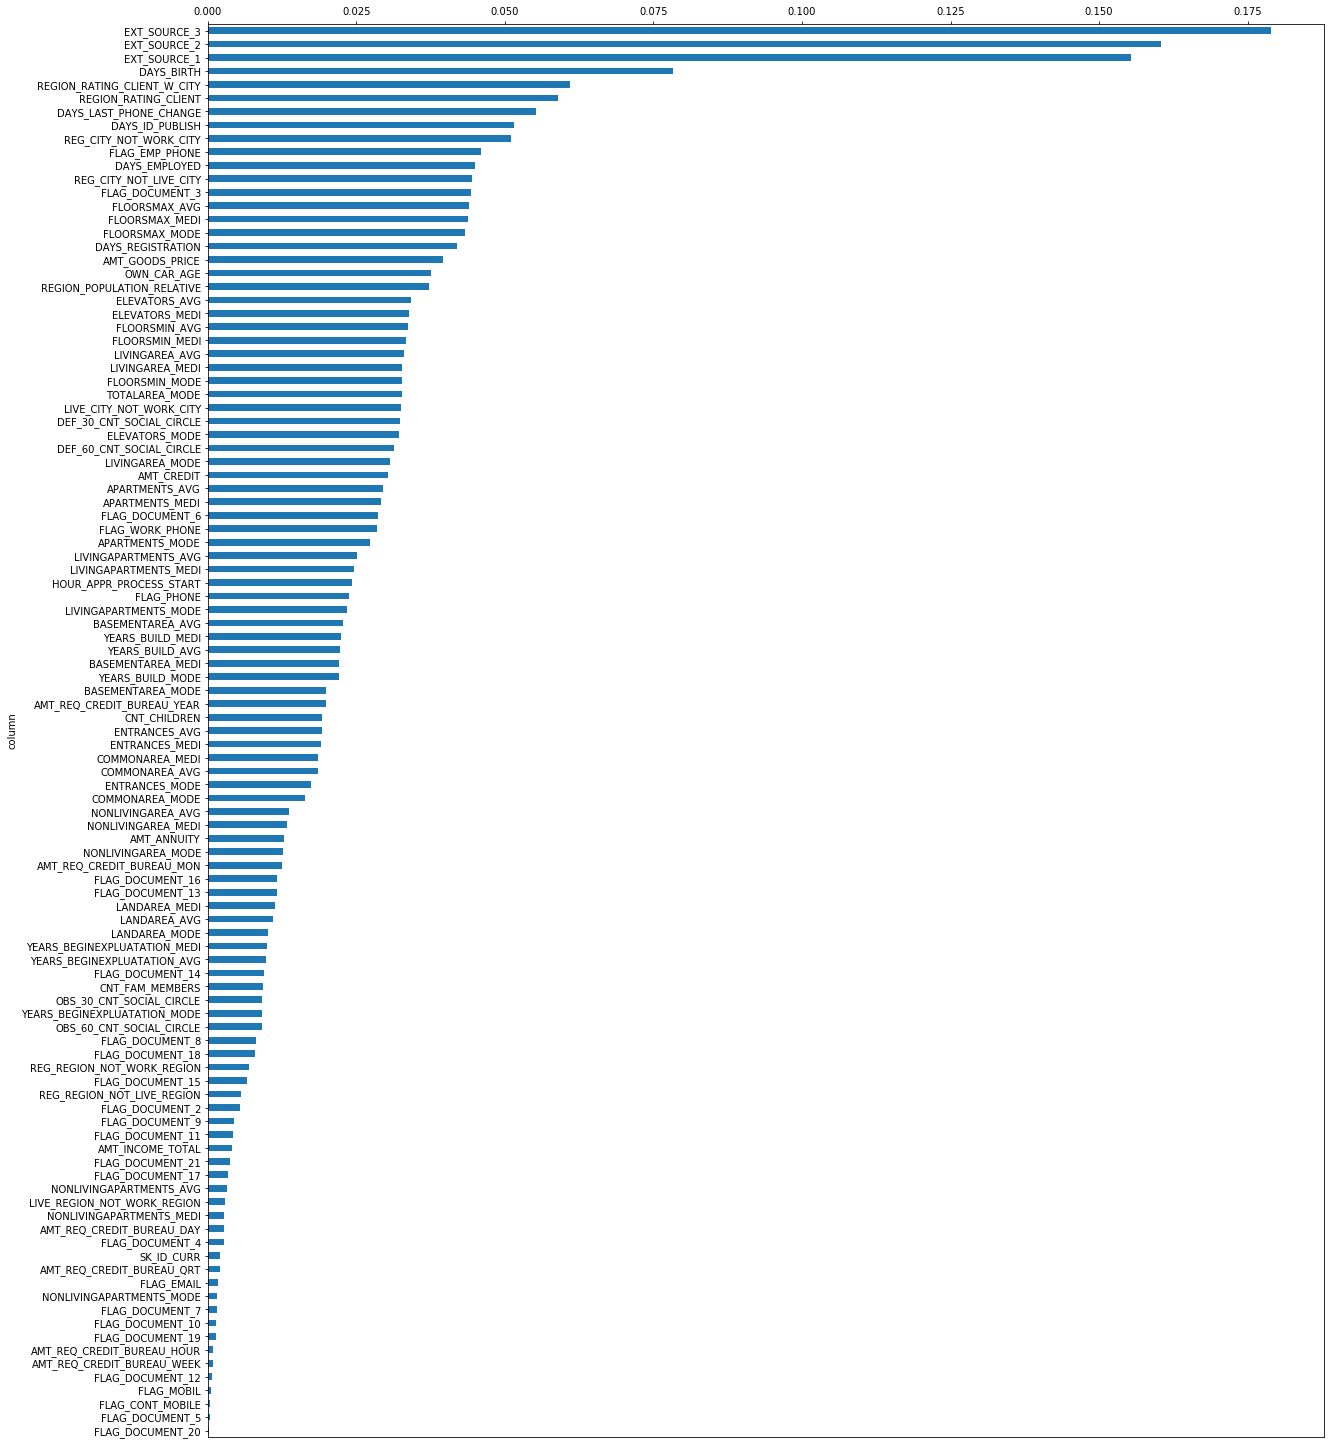

In [20]:
corr.plot()

In [21]:
corr.top(5)

['EXT_SOURCE_3',
 'EXT_SOURCE_2',
 'EXT_SOURCE_1',
 'DAYS_BIRTH',
 'REGION_RATING_CLIENT_W_CITY']

In [78]:
corr[:30]

,column,corr,neg
31,EXT_SOURCE_3,0.178919,True
30,EXT_SOURCE_2,0.160472,True
29,EXT_SOURCE_1,0.155317,True
8,DAYS_BIRTH,0.078239,False
21,REGION_RATING_CLIENT_W_CITY,0.060893,False
20,REGION_RATING_CLIENT,0.058899,False
79,DAYS_LAST_PHONE_CHANGE,0.055218,False
11,DAYS_ID_PUBLISH,0.051457,False
27,REG_CITY_NOT_WORK_CITY,0.050994,False
14,FLAG_EMP_PHONE,0.045982,False


## histogram

In [22]:
hist = histogram.from_df(app_train, 'DAYS_BIRTH')

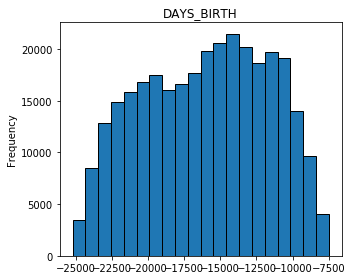

In [23]:
hist.plot()

## kde plot

In [14]:
kde = KernelDensityEstimation.from_df(app_train, 'TARGET', ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3'])

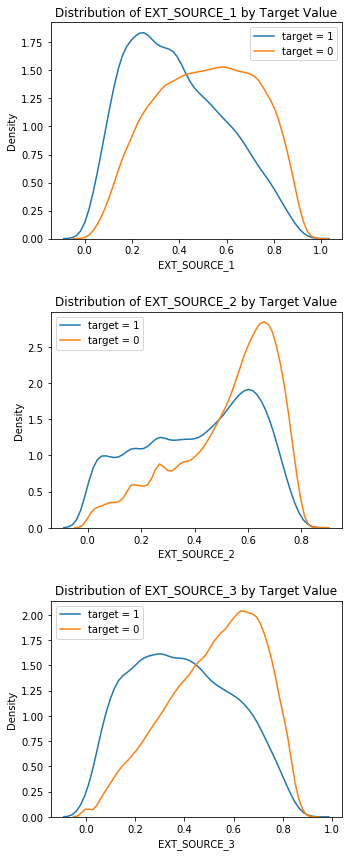

In [15]:
kde.plot()

In [ ]:
### the younger is more likely to not pay the loan on time

# feature enginerring

after create new feature, lets check by correlation with target variable

https://www.kaggle.com/jsaguiar/updated-0-792-lb-lightgbm-with-simple-features/code
The following key ideas were used:
- Divide or subtract important features to get rates (like annuity and income)
- In Bureau Data: create specific features for Active credits and Closed credits
- In Previous Applications: create specific features for Approved and Refused applications
- Modularity: one function for each table (except bureau_balance and application_test)
- One-hot encoding for categorical features
All tables are joined with the application DF using the SK_ID_CURR key (except bureau_balance).

filter then agrreate

## function

In [ ]:
### customize aggreate function

In [133]:
#we arrow down the columns that make sense
x_train = x_train[ipt_ft]

In [ ]:
list(params.keys())+to_list(by_col)

In [173]:
def aggreate(df, params, by_col, prefix = 'AGG'):
    '''mean, median, prod, sum, std, var, max, min, count, nunique'''
    df_agg = df.groupby(by_col).agg(params)
    df_agg.columns = ['_'.join([prefix.upper(), c[0], c[1].upper()]) for c in df_agg.columns.tolist()]
    return df_agg.reset_index()

In [67]:
def suma(x): return np.sum(x)

## create new varible by different btw two variable with division or minus

In [155]:
x_train['DAYS_EMPLOYED_PERC'] = x_train['DAYS_EMPLOYED']/x_train['DAYS_BIRTH']
x_train['INCOME_CREDIT_PERC'] = x_train['AMT_INCOME_TOTAL']/x_train['AMT_CREDIT']
x_train['INCOME_PER_PERSON'] = x_train['AMT_INCOME_TOTAL']/x_train['CNT_FAM_MEMBERS']

In [ ]:
#credit per person??

## Basic agrreate function

we can use a define function like: def suma(x): return np.sum(x)
or use quick lambda function: lambda x: np.sum(x)

In [134]:
agg_params = {'AMT_CREDIT_MAX_OVERDUE' : ['sum', 'min'], 
              'AMT_CREDIT_SUM' : ['min', 'max'],
             'CREDIT_DAY_OVERDUE': ['min', 'max']}

In [135]:
br_agg = aggreate(bureau_proc, agg_params, 'SK_ID_CURR')

In [137]:
#join back
x_train = x_train.merge(br_agg, how='left', on='SK_ID_CURR')

In [140]:
x_train.columns

Index(['EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'DAYS_REGISTRATION',
       'DAYS_ID_PUBLISH', 'SK_ID_CURR', 'AMT_ANNUITY', 'DAYS_EMPLOYED',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_CREDIT', 'AMT_INCOME_TOTAL',
       'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'EXT_SOURCE_1',
       'HOUR_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'OCCUPATION_TYPE',
       'AMT_REQ_CREDIT_BUREAU_YEAR', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'OWN_CAR_AGE', 'CNT_FAM_MEMBERS',
       'TOTALAREA_MODE', 'LIVINGAREA_MODE', 'CNT_CHILDREN', 'LIVINGAREA_MEDI',
       'LIVINGAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG',
       'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BEGINEXPLUATATION_MEDI',
       'AGG_AMT_CREDIT_MAX_OVERDUE_SUM', 'AGG_AMT_CREDIT_MAX_OVERDUE_MIN',
       'AGG_AMT_CREDIT_SUM_MIN', 'AGG_AMT_CREDIT_SUM_MAX',
       'AGG_CREDIT_DAY_OVERDUE_MIN', 'AGG_CREDIT_DAY_OVERDUE_MAX'],
      dtype='object')

df after merge have so much null values. Do we need fill by value or leave model treat it?

In [ ]:
##or do it by this way???
group_object = groupby_SK_ID_CURR['AMT_CREDIT_SUM_DEBT'].agg('sum').reset_index()
group_object.rename(index=str, columns={'AMT_CREDIT_SUM_DEBT': 'bureau_total_customer_debt'},inplace=True)

## filter by values of columns then aggreate

CREDIT_ACTIVE_Active

In [142]:
active = bureau_proc[bureau_proc['CREDIT_ACTIVE_Active'] == 1]
active_agg = aggreate(active, agg_params, 'SK_ID_CURR', 'ACTIVE')
x_train = x_train.merge(active_agg, how='left', on='SK_ID_CURR')
del active, active_agg
gc.collect()

In [150]:
close = bureau_proc[bureau_proc['CREDIT_ACTIVE_Closed'] == 1]
close_agg = aggreate(close, agg_params, 'SK_ID_CURR', 'CLOSED')
x_train = x_train.merge(close_agg, how='left', on='SK_ID_CURR')
del close, close_agg
gc.collect()

465

## create variable base on time

In [63]:
app_train_proc['long_employment'] = (app_train_proc['DAYS_EMPLOYED'] < -2000).astype(int)

In [ ]:
get first or last

In [ ]:
for example. cut of 3 months near,

In [ ]:
eval('np.{}'.format(function_name))(X[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']], axis=1)

## merge

In [ ]:
bureau_proc.groupby('SK_ID_CURR', as_index=False).count().rename(columns = {'SK_ID_BUREAU': 'previous_loan_counts'})

In [23]:
previous_loan_count = bureau_proc.groupby('SK_ID_CURR', as_index=False)['SK_ID_BUREAU'].count().rename(columns = {'SK_ID_BUREAU': 'previous_loan_counts'})

In [26]:
app_train_proc.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,WALLSMATERIAL_MODE_nan,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,EMERGENCYSTATE_MODE_nan
0,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,-3648.0,-2120,...,0,0,0,0,1,0,0,1,0,0
1,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,-1186.0,-291,...,0,0,0,0,0,0,0,1,0,0
2,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,-4260.0,-2531,...,0,0,0,0,0,0,1,0,0,1
3,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,-9833.0,-2437,...,0,0,0,0,0,0,1,0,0,1
4,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,-4311.0,-3458,...,0,0,0,0,0,0,1,0,0,1


In [32]:
app_train_proc = app_train_proc.merge(previous_loan_count, on = 'SK_ID_CURR', how = 'left')

In [33]:
app_train_proc.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,WALLSMATERIAL_MODE_nan,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,EMERGENCYSTATE_MODE_nan,previous_loan_counts
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,...,0,0,0,1,0,0,1,0,0,8.0
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,...,0,0,0,0,0,0,1,0,0,4.0
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,...,0,0,0,0,0,1,0,0,1,2.0
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,...,0,0,0,0,0,1,0,0,1,NaN
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,...,0,0,0,0,0,1,0,0,1,1.0


In [34]:
kde_new = KernelDensityEstimation.from_df(app_train_proc, 'TARGET', 'previous_loan_counts')

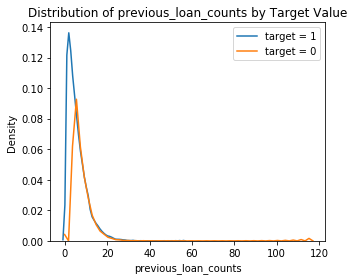

In [35]:
kde_new.plot()

# split validation set

http://www.fast.ai/2017/11/13/validation-sets/

this is the most important part of any ML project, but people usualy use train_test_split in sklearn. The key is create a good validation set that similar to test set - or in similar mean - similar to real world problem. Not to create random validation set.
\

- need to find out, what combination of category values of test set that not in train set
- range or property of countinous var for each combination
- how to split same distribution of category variable?

## messi things

In [14]:
cons, cats = get_cons_cats(app_train)

In [20]:
key = app_test[cats].drop_duplicates().values

In [21]:
key = {'~'.join([str(j) for j in i]):[] for i in key}

In [31]:
key_set =  set(key.keys())

In [44]:
def get_key(r): return '~'.join([str(j) for j in r.values])

In [45]:
b = app_train[cats].apply(get_key, axis=1)

In [ ]:
app_train[cats].groupby()

## dataset

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
x_trn, x_val, y_trn, y_val = train_test_split(app_train_proc, y, test_size=0.2, stratify = y)

In [8]:
col_sample = x_trn.columns[:70]

In [9]:
x_trn = x_trn[col_sample]
x_val = x_val[col_sample]

In [10]:
dataset = LGBDataset(x_trn, y_trn, x_val, y_val)

# baseline model

In [11]:
params = {
    #https://github.com/Microsoft/LightGBM/blob/master/docs/Parameters.rst
    'task': 'train',
    'objective': 'binary',
    'n_estimators':10,
    'learning_rate':0.1,
    'num_leaves':30,
    'colsample_bytree':.8,
    'subsample':.9,
    'max_depth':7,
    'reg_alpha':.1,
    'reg_lambda':.1,
    'min_split_gain':.01,
    'min_child_weight':2,
    'verbose':3,
    'metric': 'binary_logloss'}

In [17]:
learner = LGBLearner(dataset)

In [18]:
learner.fit(params) #, early_stopping_rounds=5

[1]	valid_0's binary_logloss: 0.624912
[2]	valid_0's binary_logloss: 0.569154
[3]	valid_0's binary_logloss: 0.522947
[4]	valid_0's binary_logloss: 0.484272
[5]	valid_0's binary_logloss: 0.451809
[6]	valid_0's binary_logloss: 0.424098
[7]	valid_0's binary_logloss: 0.400465
[8]	valid_0's binary_logloss: 0.380221
[9]	valid_0's binary_logloss: 0.36286
[10]	valid_0's binary_logloss: 0.348139


# dendrogram

In [20]:
ddg = dendogram.from_df(x_trn)

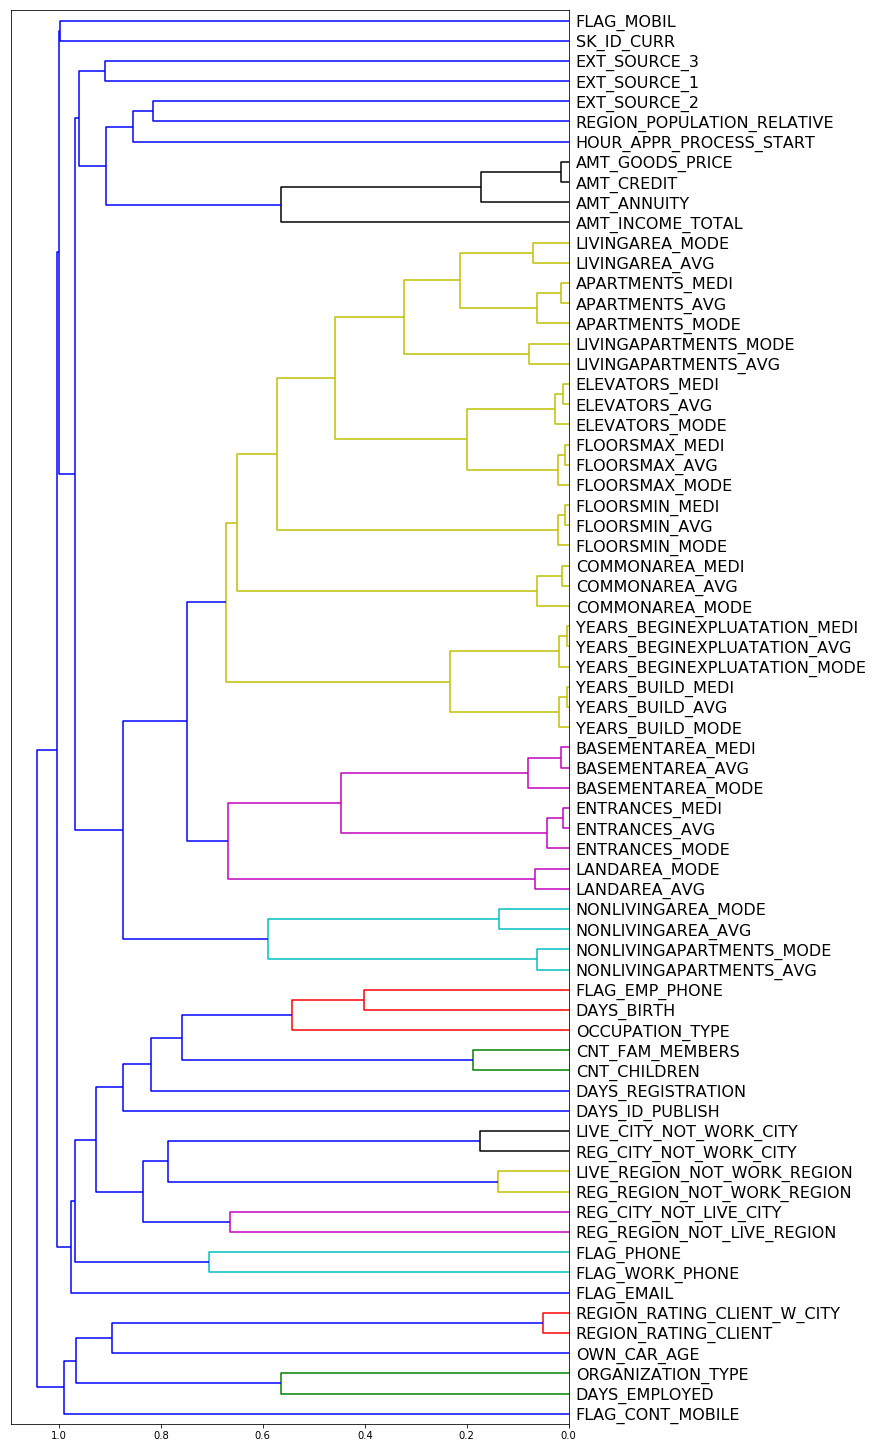

In [21]:
ddg.plot()

In [22]:
col_group = [['AMT_GOODS_PRICE', 'AMT_CREDIT', 'AMT_ANNUITY'],
            ['LIVINGAREA_MODE', 'LIVINGAREA_AVG'],
            ['APARTMENTS_AVG', 'APARTMENTS_MEDI', 'APARTMENTS_MODE'],
            ['LIVINGAPARTMENTS_MODE', 'LIVINGAPARTMENTS_AVG'],
            ['ELEVATORS_AVG', 'ELEVATORS_MEDI', 'ELEVATORS_MODE'],
            ['FLOORSMAX_AVG', 'FLOORSMAX_MEDI', 'FLOORSMAX_MODE'],
            ['FLOORSMIN_AVG', 'FLOORSMIN_MODE'],
            ['COMMONAREA_AVG', 'COMMONAREA_MEDI', 'COMMONAREA_MODE'],
            ['YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BEGINEXPLUATATION_MODE'],
            ['YEARS_BUILD_AVG', 'YEARS_BUILD_MEDI', 'YEARS_BUILD_MODE'],
            ['BASEMENTAREA_AVG', 'BASEMENTAREA_MEDI', 'BASEMENTAREA_MODE'],
            ['ENTRANCES_AVG', 'ENTRANCES_MEDI', 'ENTRANCES_MODE'],
            ['LANDAREA_AVG', 'LANDAREA_MODE'],
            ['NONLIVINGAREA_AVG', 'NONLIVINGAREA_MODE'],
            ['NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAPARTMENTS_AVG'],
            ['CNT_CHILDREN', 'CNT_FAM_MEMBERS'],
            ['LIVE_CITY_NOT_WORK_CITY', 'REG_CITY_NOT_LIVE_CITY'],
            ['LIVE_REGION_NOT_WORK_REGION', 'REG_REGION_NOT_WORK_REGION'],
            ['REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY']]

In [23]:
col_group = col_group + [i for i in x_trn.columns if i not in flat_list(col_group)]

In [24]:
col_group

[['AMT_GOODS_PRICE', 'AMT_CREDIT', 'AMT_ANNUITY'],
 ['LIVINGAREA_MODE', 'LIVINGAREA_AVG'],
 ['APARTMENTS_AVG', 'APARTMENTS_MEDI', 'APARTMENTS_MODE'],
 ['LIVINGAPARTMENTS_MODE', 'LIVINGAPARTMENTS_AVG'],
 ['ELEVATORS_AVG', 'ELEVATORS_MEDI', 'ELEVATORS_MODE'],
 ['FLOORSMAX_AVG', 'FLOORSMAX_MEDI', 'FLOORSMAX_MODE'],
 ['FLOORSMIN_AVG', 'FLOORSMIN_MODE'],
 ['COMMONAREA_AVG', 'COMMONAREA_MEDI', 'COMMONAREA_MODE'],
 ['YEARS_BEGINEXPLUATATION_AVG',
  'YEARS_BEGINEXPLUATATION_MEDI',
  'YEARS_BEGINEXPLUATATION_MODE'],
 ['YEARS_BUILD_AVG', 'YEARS_BUILD_MEDI', 'YEARS_BUILD_MODE'],
 ['BASEMENTAREA_AVG', 'BASEMENTAREA_MEDI', 'BASEMENTAREA_MODE'],
 ['ENTRANCES_AVG', 'ENTRANCES_MEDI', 'ENTRANCES_MODE'],
 ['LANDAREA_AVG', 'LANDAREA_MODE'],
 ['NONLIVINGAREA_AVG', 'NONLIVINGAREA_MODE'],
 ['NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAPARTMENTS_AVG'],
 ['CNT_CHILDREN', 'CNT_FAM_MEMBERS'],
 ['LIVE_CITY_NOT_WORK_CITY', 'REG_CITY_NOT_LIVE_CITY'],
 ['LIVE_REGION_NOT_WORK_REGION', 'REG_REGION_NOT_WORK_REGION'],
 ['REG

# feature importance

In [25]:
impt = importance.from_LGB_learner(learner, col_group)

In [26]:
impt.I[:5]

,Feature,Importance
40,EXT_SOURCE_3,0.079002
39,EXT_SOURCE_2,0.065391
38,EXT_SOURCE_1,0.021383
0,AMT_GOODS_PRICE & AMT_CREDIT & AMT_ANNUITY,0.008218
22,DAYS_BIRTH,0.004743


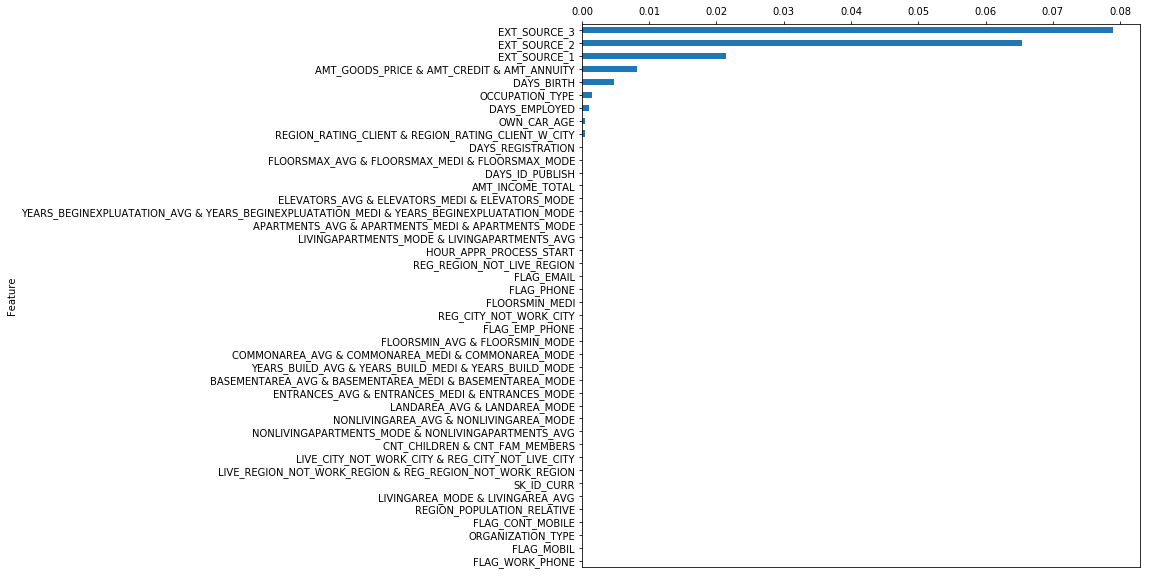

In [27]:
impt.plot()

## compare with default feature importance

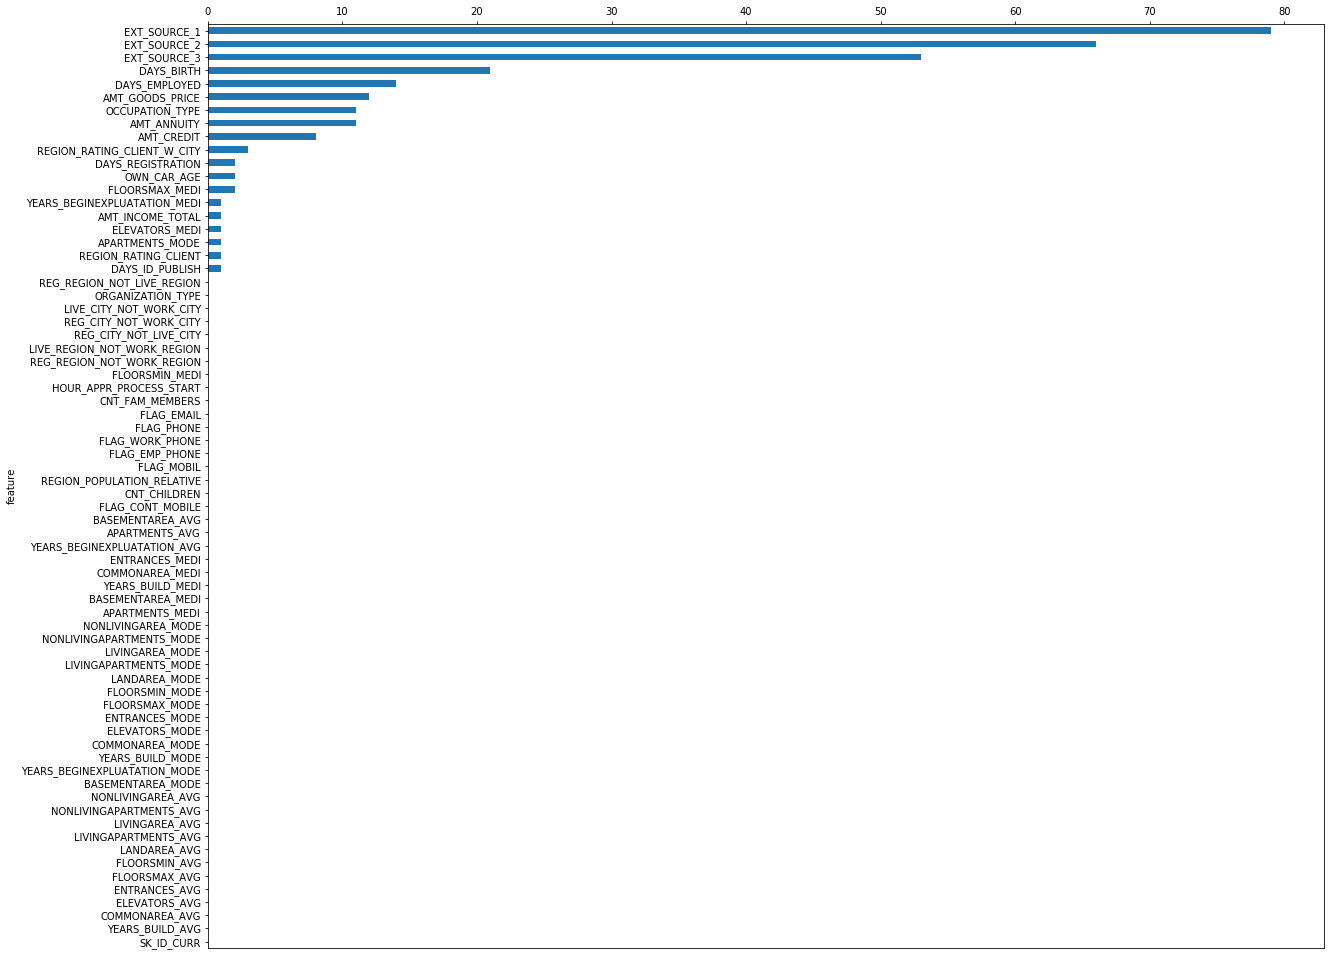

In [36]:
plot_barh(pd.DataFrame.from_dict({'feature': x_trn.columns, 
                                  'imporance': learner.md.feature_importance()}))

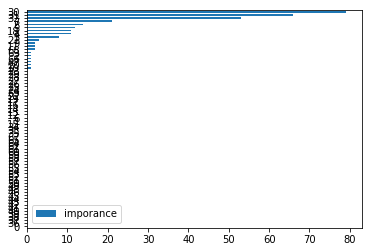

In [35]:
df_impt.sort_values(by = 'imporance', ascending=True).plot.barh()

# model interpretation